## This is a demo to download DEM of a given coordinate box from MML database and delineate one catchment

In [3]:
from tools import dem_from_mml, delineate_catchment_from_dem, fill_cmask_holes
import pandas as pd
import numpy as np

# inputs parameters
#subset = [370000,7537500,390000,7557500] # coordinate box of the dem, PALLAS
subset = [350000,6857000,360000,6865000] # coordinate box of the dem, KUIVAJARVI

apifile = r'/scratch/project_2000908/nousu/GISPUTS/apikey.txt' # api-key for MML database (registration needed)
apikey = np.loadtxt(apifile, dtype='str') # api-key loaded from a txt-file

# reading stream outlet file
streams_file = '/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/stream_outlets.csv'
streams = pd.read_csv(streams_file, sep=';', usecols=['stream'], encoding = "ISO-8859-1")['stream'].to_list()

# output path
outpath = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs'

#### Downloading DEM subset from MML database

In [4]:
dem, out_fp = dem_from_mml(outpath, 
                           subset, 
                           apikey=apikey)

In [3]:
#### Delineating the catchment as defined in stream_outlets.csv file 


*** Delineating kuivajarvi catchment ***


/projappl/project_2000908/nousu/SpaFHy_GISPUTS/tools.py:329: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  outlet_x = float(outlets.loc[outlets['stream'] == catchment_name, 'lon'])
/projappl/project_2000908/nousu/SpaFHy_GISPUTS/tools.py:330: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  outlet_y = float(outlets.loc[outlets['stream'] == catchment_name, 'lat'])


*** kuivajarvi catchment is delineated and DEM derivatives are saved ***


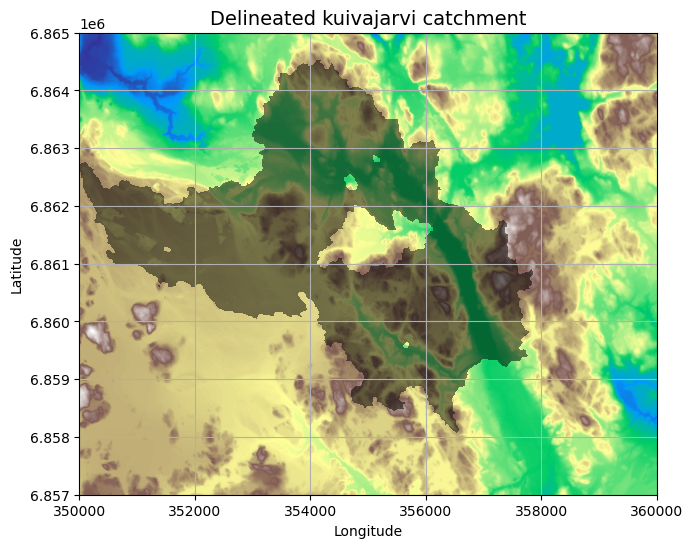

In [5]:
#out_fp = r'F:\Pallaslake_Catchment\GIS_inputs\korkeusmalli_16m.tif'
delineate_catchment_from_dem(dem_path=out_fp,
                             catchment_name='kuivajarvi',
                             outfolder=outpath,
                             outlet_file=streams_file,
                             clip_catchment=True)

#### Let's fill possible holes in catchments masks

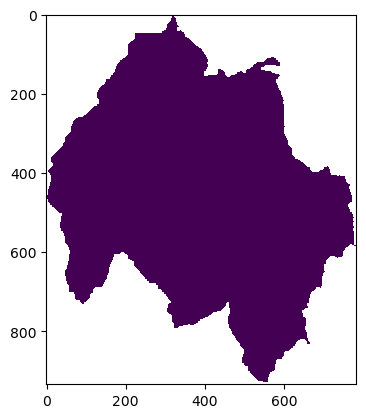

In [9]:
fp = r'/scratch/project_2000908/nousu/GISPUTS/Pallaslake_Catchment/GIS_inputs/pallasjoki/cmask_d8_pallasjoki.asc'
fill_cmask_holes(fp)